In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt  # ‚úÖ ÎàÑÎùΩÎêú Î∂ÄÎ∂Ñ
import seaborn as sns
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer  # KNN Î≥¥Í∞Ñ

# ‚ö†Ô∏è FutureWarning Î¨¥Ïãú (Î≤ÑÏ†Ñ Ìò∏ÌôòÏÑ± Ïù¥Ïäà Î∞©ÏßÄÏö©)
warnings.simplefilter(action='ignore', category=FutureWarning)

# ‚úÖ ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (MacÏö© AppleGothic, WindowsÎäî 'Malgun Gothic')
rc('font', family='AppleGothic')

# ‚úÖ ÎßàÏù¥ÎÑàÏä§(-) Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

In [3]:
train = pd.read_csv('../../data/raw/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4376 non-null   object 
 1   ÏÑ§Î¶ΩÏó∞ÎèÑ            4376 non-null   int64  
 2   Íµ≠Í∞Ä              4376 non-null   object 
 3   Î∂ÑÏïº              3519 non-null   object 
 4   Ìà¨ÏûêÎã®Í≥Ñ            4376 non-null   object 
 5   ÏßÅÏõê Ïàò            4202 non-null   float64
 6   Ïù∏ÏàòÏó¨Î∂Ä            4376 non-null   object 
 7   ÏÉÅÏû•Ïó¨Î∂Ä            4376 non-null   object 
 8   Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)        3056 non-null   float64
 9   Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)       4376 non-null   float64
 10  Ïó∞Îß§Ï∂ú(ÏñµÏõê)         4376 non-null   float64
 11  SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)  4376 non-null   float64
 12  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)       3156 non-null   object 
 13  ÏÑ±Í≥µÌôïÎ•†            4376 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 478

In [4]:
train['ÏÑ±Í≥µÌôïÎ•†'].value_counts()

ÏÑ±Í≥µÌôïÎ•†
0.7    590
0.6    579
0.3    574
0.4    561
0.5    559
0.8    548
0.1    490
0.9    475
Name: count, dtype: int64

In [5]:
test = pd.read_csv('../../data/raw/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1755 entries, 0 to 1754
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1755 non-null   object 
 1   ÏÑ§Î¶ΩÏó∞ÎèÑ            1755 non-null   int64  
 2   Íµ≠Í∞Ä              1755 non-null   object 
 3   Î∂ÑÏïº              1401 non-null   object 
 4   Ìà¨ÏûêÎã®Í≥Ñ            1755 non-null   object 
 5   ÏßÅÏõê Ïàò            1679 non-null   float64
 6   Ïù∏ÏàòÏó¨Î∂Ä            1755 non-null   object 
 7   ÏÉÅÏû•Ïó¨Î∂Ä            1755 non-null   object 
 8   Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)        1208 non-null   float64
 9   Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)       1755 non-null   float64
 10  Ïó∞Îß§Ï∂ú(ÏñµÏõê)         1755 non-null   float64
 11  SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)  1755 non-null   float64
 12  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)       1268 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 178.4+ KB


# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò

In [6]:
def preprocess(df):
    """
    Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÎåÄÌï¥ Ï†ÑÏ≤òÎ¶¨ ÏàòÌñâ:
    - Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
    - Ïù∏ÏΩîÎî©
    - Îß§Ìïë
    - ÌòïÎ≥ÄÌôò Îì±
    """
    # Í≥†Í∞ùÏàò, Í∏∞ÏóÖÍ∞ÄÏπòÏùò Í≤∞Ï∏°ÏπòÍ∞Ä ÎÜíÏúºÎØÄÎ°ú KNN Î≥¥Í∞ÑÎ≤ïÏùÑ ÏÇ¨Ïö©Ìï¥Î≥∏Îã§.
    # 1. ÏÑ§Î¶ΩÏó∞ÎèÑ: Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö© (Ìå®Ïä§)

    # 2. Íµ≠Í∞Ä: ÏõêÌï´ Ïù∏ÏΩîÎî©
    df = pd.get_dummies(df, columns=['Íµ≠Í∞Ä'])

    # 3. Î∂ÑÏïº: Í≤∞Ï∏°Ïπò ‚Üí 'Unknown', ÏõêÌï´ Ïù∏ÏΩîÎî©
    df['Î∂ÑÏïº'].fillna('Unknown', inplace=True)
    df = pd.get_dummies(df, columns=['Î∂ÑÏïº'])

    # 4. Ìà¨ÏûêÎã®Í≥Ñ: ÏàòÎèô Îß§Ìïë
    investment_stage_order = {
        'Seed': 0,
        'Series A': 1,
        'Series B': 2,
        'Series C': 3,
        'IPO': 4
    }
    df['Ìà¨ÏûêÎã®Í≥Ñ'] = df['Ìà¨ÏûêÎã®Í≥Ñ'].map(investment_stage_order)

    # 5. ÏßÅÏõê Ïàò: ÌèâÍ∑†ÏúºÎ°ú ÎåÄÏ≤¥
    mean_emp = df['ÏßÅÏõê Ïàò'].mean()
    df['ÏßÅÏõê Ïàò'].fillna(mean_emp, inplace=True)

    # 6. Ïù∏ÏàòÏó¨Î∂Ä, ÏÉÅÏû•Ïó¨Î∂Ä: ÏõêÌï´ Ïù∏ÏΩîÎî©
    df = pd.get_dummies(df, columns=['Ïù∏ÏàòÏó¨Î∂Ä', 'ÏÉÅÏû•Ïó¨Î∂Ä'])

    # 7. Í≥†Í∞ùÏàò: Ï§ëÏïôÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
    # median_cust = df['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'].median()
    # df['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'].fillna(median_cust, inplace=True)
    if df['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'].isnull().any():
        knn_imputer = KNNImputer(n_neighbors=5)
        scaler = MinMaxScaler()
    
        cust_array = df[['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)']].values.astype(float)
        cust_scaled = scaler.fit_transform(cust_array)
    
        cust_imputed_scaled = knn_imputer.fit_transform(cust_scaled)
        cust_imputed = scaler.inverse_transform(cust_imputed_scaled)
    
        df['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'] = cust_imputed.flatten()

    # 8. Ï¥ù Ìà¨ÏûêÍ∏à, Ïó∞Îß§Ï∂ú: Ï†ïÏàòÌòï Î≥ÄÌôò
    df['Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)'] = df['Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)'].astype(int)
    df['Ïó∞Îß§Ï∂ú(ÏñµÏõê)'] = df['Ïó∞Îß§Ï∂ú(ÏñµÏõê)'].astype(int)

    # 9. SNS ÌåîÎ°úÏõå Ïàò: ÏµúÎπàÍ∞íÏúºÎ°ú ÎåÄÏ≤¥
    mode_sns = df['SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)'].mode()[0]
    df['SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)'].fillna(mode_sns, inplace=True)

    # 10. Í∏∞ÏóÖÍ∞ÄÏπò: Í≤∞Ï∏°Ïπò Î≥¥ÏôÑ + ÏàòÏπò Îß§Ìïë
    df['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'].fillna('4500~6000', inplace=True)
    value_map = {
        '1500-2500': 2000,
        '2500-3500': 3000,
        '3500-4500': 4000,
        '4500-6000': 5250,
        '6000Ïù¥ÏÉÅ': 6500
    }
    df['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'] = df['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'].map(value_map)
#    df['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'].fillna(5250, inplace=True)  # Îß§Ìïë Ïã§Ìå® Î≥¥ÏôÑ
    # KNN Î≥¥Í∞ÑÎ≤ïÏúºÎ°ú Í∏∞ÏóÖÍ∞ÄÏπò Í≤∞Ï∏°Ïπò Î≥¥ÏôÑ
    if df['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'].isnull().any():
        knn_imputer = KNNImputer(n_neighbors=5)
        scaler = MinMaxScaler()

        # 2D Î∞∞Ïó¥Î°ú Î≥ÄÌôò ÌõÑ Ïä§ÏºÄÏùºÎßÅ
        value_array = df[['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)']].values.astype(float)
        value_scaled = scaler.fit_transform(value_array)

        # KNN Î≥¥Í∞Ñ
        value_imputed_scaled = knn_imputer.fit_transform(value_scaled)

        # Ïä§ÏºÄÏùº Î≥µÏõê
        value_imputed = scaler.inverse_transform(value_imputed_scaled)

        # Î≥¥Í∞Ñ Í≤∞Í≥º ÏõêÎ≥∏Ïóê Î∞òÏòÅ
        df['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'] = value_imputed.flatten()
    
    return df

# ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±

In [7]:
def add_features(df):
    # 1. Í∏∞ÏóÖÎÇòÏù¥
    df['Í∏∞ÏóÖÎÇòÏù¥'] = 2025 - df['ÏÑ§Î¶ΩÏó∞ÎèÑ']

    # 2. ÏßÅÏõêÎãπ Îß§Ï∂ú
    df['ÏßÅÏõêÎãπÎß§Ï∂ú'] = df['Ïó∞Îß§Ï∂ú(ÏñµÏõê)'] / df['ÏßÅÏõê Ïàò'].replace(0, np.nan)

    # 3. Í≥†Í∞ùÎãπ Îß§Ï∂ú
    df['Í≥†Í∞ùÎãπÎß§Ï∂ú'] = df['Ïó∞Îß§Ï∂ú(ÏñµÏõê)'] / df['Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)'].replace(0, np.nan)

    # 4. Ìà¨ÏûêÏàòÏùµÎπÑ
    df['Ìà¨ÏûêÏàòÏùµÎπÑ'] = df['Ïó∞Îß§Ï∂ú(ÏñµÏõê)'] / df['Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)'].replace(0, np.nan)

    # 5. SNS ÌåîÎ°úÏõå Îì±Í∏â
    df['SNSÌåîÎ°úÏõåÎì±Í∏â'] = pd.cut(df['SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)'],
                                 bins=[-1, 1, 3, 10],
                                 labels=[0, 1, 2])  # ÎÇÆÏùå=0, Ï§ëÍ∞Ñ=1, ÎÜíÏùå=2
    df['SNSÌåîÎ°úÏõåÎì±Í∏â'] = df['SNSÌåîÎ°úÏõåÎì±Í∏â'].astype(int)

    # 6. Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú (Í∏∞ÏóÖÍ∞ÄÏπò Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Ìè¨Ìï®)
    df['Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú'] = df['Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)'] / df['Ïó∞Îß§Ï∂ú(ÏñµÏõê)'].replace(0, np.nan)

    # 7. Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò
    df['Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò'] = df['ÏßÅÏõê Ïàò'] / df['Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)'].replace(0, np.nan)

    return df

# Ïä§ÏºÄÏùºÎßÅ (MinMaxScaler, Log)

In [8]:
def scaleing(df):
    scale_cols = [
        'ÏÑ§Î¶ΩÏó∞ÎèÑ',
        'Ìà¨ÏûêÎã®Í≥Ñ',
        'ÏßÅÏõê Ïàò',
        'Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)',
        'Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)',
        'Ïó∞Îß§Ï∂ú(ÏñµÏõê)',
        'SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)',
        'Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)',
        'Í∏∞ÏóÖÎÇòÏù¥',
        'ÏßÅÏõêÎãπÎß§Ï∂ú',
        'Í≥†Í∞ùÎãπÎß§Ï∂ú',
        'Ìà¨ÏûêÏàòÏùµÎπÑ',
        'Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú',
        'Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò',
        'SNSÌåîÎ°úÏõåÎì±Í∏â',
        #'ÏÑ±Í≥µÌôïÎ•†'
    ]
    # Ïä§ÏºÄÏùºÎßÅ Ï†ÅÏö©
    scaler = MinMaxScaler()
    train[scale_cols] = scaler.fit_transform(train[scale_cols])
    
    # ÌÉÄÍ≤üÎ≥ÄÏàò Î°úÍ∑∏ Ïä§ÏºÄÏùºÎßÅ
    #train['ÏÑ±Í≥µÌôïÎ•†'] = np.log(train['ÏÑ±Í≥µÌôïÎ•†'])
    return df

In [9]:
def scaleing_for_test(df):
    '''
    Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞ÏóêÎäî ÏÑ±Í≥µÌôïÎ•† Ïª¨ÎüºÏù¥ ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Î°úÍ∑∏ Î≥ÄÌôò ÏΩîÎìúÎ•º ÏÇ≠Ï†úÌï®
    '''
    scale_cols = [
        'ÏÑ§Î¶ΩÏó∞ÎèÑ',
        'Ìà¨ÏûêÎã®Í≥Ñ',
        'ÏßÅÏõê Ïàò',
        'Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)',
        'Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)',
        'Ïó∞Îß§Ï∂ú(ÏñµÏõê)',
        'SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)',
        'Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)',
        'Í∏∞ÏóÖÎÇòÏù¥',
        'ÏßÅÏõêÎãπÎß§Ï∂ú',
        'Í≥†Í∞ùÎãπÎß§Ï∂ú',
        'Ìà¨ÏûêÏàòÏùµÎπÑ',
        'Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú',
        'Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò',
        'SNSÌåîÎ°úÏõåÎì±Í∏â'
    ]
    # Ïä§ÏºÄÏùºÎßÅ Ï†ÅÏö©
    scaler = MinMaxScaler()
    df[scale_cols] = scaler.fit_transform(df[scale_cols])

    return df

# Ïñ∏ÎçîÏÉòÌîåÎßÅ

In [10]:
from sklearn.utils import resample
import pandas as pd
    
def balance_by_target_sampling(df):
    # ÏÑ±Í≥µÌôïÎ•† Í≥†Ïú†Í∞íÎ≥Ñ ÏµúÏÜå Í∞úÏàò Ï∞æÍ∏∞
    min_count = df['ÏÑ±Í≥µÌôïÎ•†'].value_counts().min()
    
    # Í∞Å ÏÑ±Í≥µÌôïÎ•† Í∑∏Î£πÎ≥ÑÎ°ú min_count ÎßåÌÅº Ïñ∏ÎçîÏÉòÌîåÎßÅ ÌõÑ Ìï©ÏπòÍ∏∞
    balanced_df = df.groupby('ÏÑ±Í≥µÌôïÎ•†').apply(
        lambda x: resample(x, replace=False, n_samples=min_count, random_state=42)
    ).reset_index(drop=True)
    
    return balanced_df


# ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ Î∞è Ï†ÄÏû•

In [11]:
train = preprocess(train)
train = add_features(train)
train = balance_by_target_sampling(train)
train = scaleing(train)

/var/folders/6v/5fx5m33x00dd03yh7nx0w9d80000gn/T/ipykernel_23844/1143587250.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('ÏÑ±Í≥µÌôïÎ•†').apply(


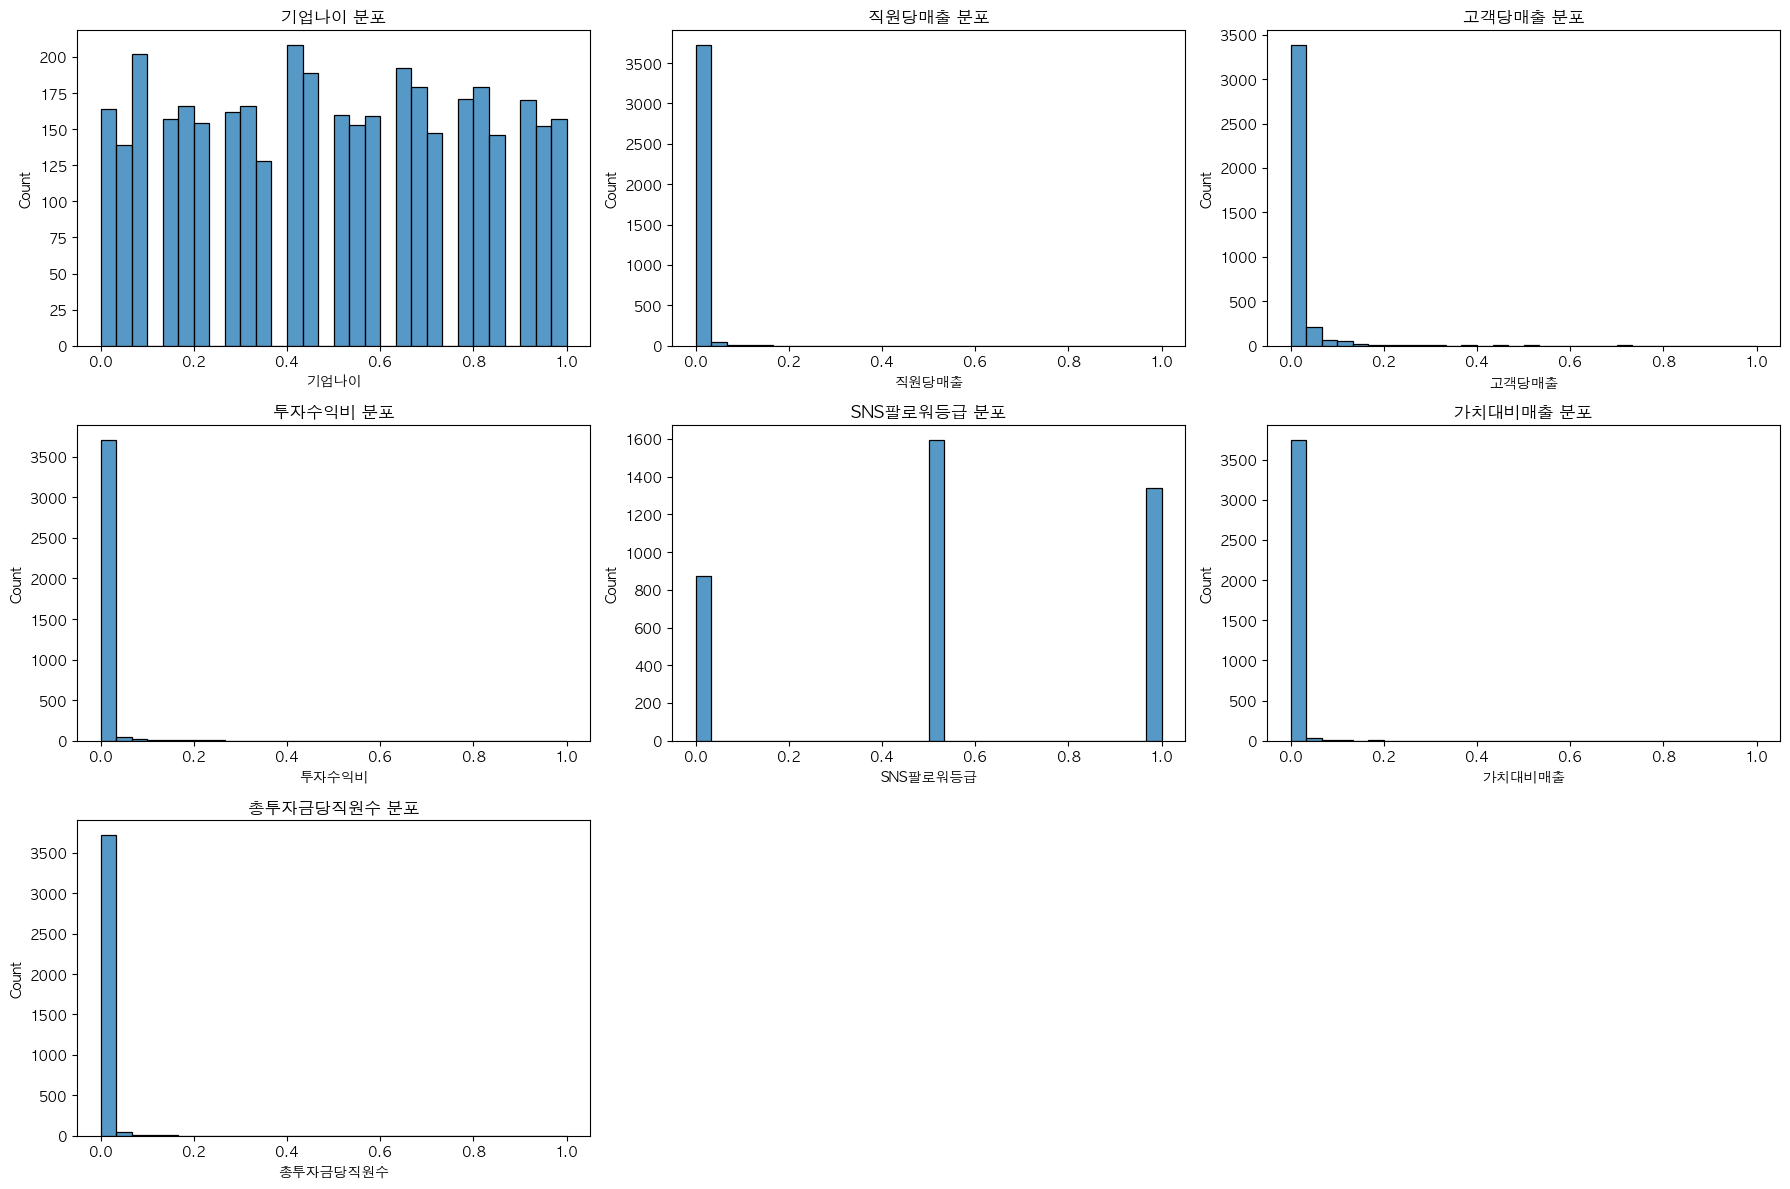

In [12]:
derived_cols = [
    'Í∏∞ÏóÖÎÇòÏù¥',
    'ÏßÅÏõêÎãπÎß§Ï∂ú',
    'Í≥†Í∞ùÎãπÎß§Ï∂ú',
    'Ìà¨ÏûêÏàòÏùµÎπÑ',
    'SNSÌåîÎ°úÏõåÎì±Í∏â',
    'Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú',
    'Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò'
]

plt.figure(figsize=(18, 12))
for i, col in enumerate(derived_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(train[col].dropna(), kde=False, bins=30)
    plt.title(f'{col} Î∂ÑÌè¨')
plt.tight_layout()
plt.show()

In [13]:
train['ÏÑ±Í≥µÌôïÎ•†'].value_counts()

ÏÑ±Í≥µÌôïÎ•†
0.1    475
0.3    475
0.4    475
0.5    475
0.6    475
0.7    475
0.8    475
0.9    475
Name: count, dtype: int64

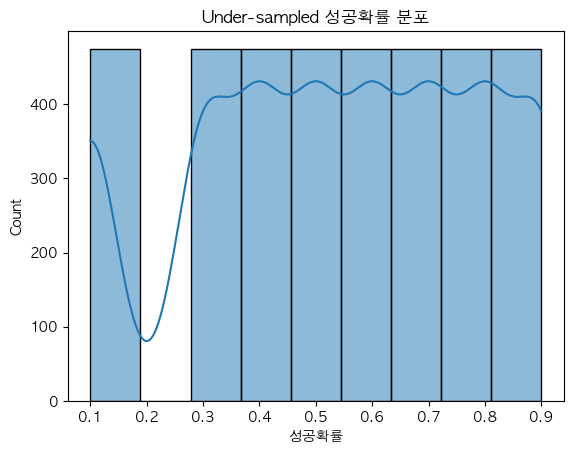

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['ÏÑ±Í≥µÌôïÎ•†'], bins=9, kde=True)
plt.title("Under-sampled ÏÑ±Í≥µÌôïÎ•† Î∂ÑÌè¨")
plt.show()

In [15]:
train.head()

ID      ÏÑ§Î¶ΩÏó∞ÎèÑ  Ìà¨ÏûêÎã®Í≥Ñ      ÏßÅÏõê Ïàò  Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)  Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)   Ïó∞Îß§Ï∂ú(ÏñµÏõê)  \
0  TRAIN_3959  0.909091  0.75  0.407170  0.112245   0.073081  0.318636   
1  TRAIN_0733  0.681818  0.75  0.609053  0.785714   0.233858  0.140176   
2  TRAIN_3824  0.454545  0.00  0.493956  0.491983   0.586491  0.855976   
3  TRAIN_4168  0.954545  0.25  0.363509  0.491983   0.168157  0.483930   
4  TRAIN_3771  0.772727  1.00  0.333267  0.491983   0.684972  0.153815   

   SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)  ÏÑ±Í≥µÌôïÎ•†  ...  Ïù∏ÏàòÏó¨Î∂Ä_Yes  ÏÉÅÏû•Ïó¨Î∂Ä_No  ÏÉÅÏû•Ïó¨Î∂Ä_Yes  \
0           0.908   0.476429   0.1  ...     False     True     False   
1           0.400   1.000000   0.1  ...     False    False      True   
2           0.596   0.476429   0.1  ...     False     True     False   
3           0.854   0.476429   0.1  ...      True     True     False   
4           0.352   0.000000   0.1  ...      True     True     False   

       Í∏∞ÏóÖÎÇòÏù¥     ÏßÅÏõêÎãπÎß§Ï∂ú     Í≥†Í∞ùÎãπÎß§Ï∂ú     Ìà¨ÏûêÏàòÏùµÎπÑ  SNSÌåîÎ°úÏõåÎì±Í∏â    Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú  Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò  
0  0.090909  0.001406  0.035461  0.008842       1.0  0.001694  0.010105  
1  0.318182  0.000414  0.002390  0.001237       0.5  0.006809  0.004792  
2  0.545455  0.003112  0.023184  0.003014       0.5  0.000438  0.001554  
3  0.045455  0.002390  0.013109  0.005907       1.0  0.001011  0.003970  
4  0.227273  0.000830  0.004168  0.000464       0.5  0.001688  0.000897  

[5 rows x 42 columns]

In [16]:
train.describe()

ÏÑ§Î¶ΩÏó∞ÎèÑ         Ìà¨ÏûêÎã®Í≥Ñ         ÏßÅÏõê Ïàò     Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)    Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)  \
count  3800.000000  3800.000000  3800.000000  3800.000000  3800.000000   
mean      0.501136     0.502961     0.493533     0.491409     0.471231   
std       0.298654     0.358600     0.284328     0.231860     0.266475   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.227273     0.250000     0.250100     0.367347     0.236555   
50%       0.500000     0.500000     0.493956     0.491983     0.483894   
75%       0.772727     0.750000     0.735079     0.622449     0.694799   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Ïó∞Îß§Ï∂ú(ÏñµÏõê)  SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)    Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)        ÏÑ±Í≥µÌôïÎ•†         Í∏∞ÏóÖÎÇòÏù¥  \
count  3800.000000     3800.000000  3800.000000  3800.00000  3800.000000   
mean      0.434193        0.516223     0.476469     0.53750     0.498864   
std       0.255047        0.283111     0.295951     0.24972     0.298654   
min       0.000000        0.000000     0.000000     0.10000     0.000000   
25%       0.209504        0.270000     0.222222     0.37500     0.227273   
50%       0.433693        0.574000     0.476429     0.55000     0.500000   
75%       0.651452        0.800000     0.722222     0.72500     0.772727   
max       1.000000        1.000000     1.000000     0.90000     1.000000   

             ÏßÅÏõêÎãπÎß§Ï∂ú        Í≥†Í∞ùÎãπÎß§Ï∂ú        Ìà¨ÏûêÏàòÏùµÎπÑ     SNSÌåîÎ°úÏõåÎì±Í∏â       Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú  \
count  3800.000000  3800.000000  3800.000000  3800.000000  3800.000000   
mean      0.005068     0.023337     0.006602     0.561316     0.004613   
std       0.025564     0.060704     0.035699     0.376219     0.031402   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000778     0.005859     0.000972     0.500000     0.000615   
50%       0.001553     0.011672     0.001911     0.500000     0.001169   
75%       0.003120     0.019920     0.003596     1.000000     0.002816   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò  
count  3800.000000  
mean      0.006147  
std       0.034317  
min       0.000000  
25%       0.001002  
50%       0.001960  
75%       0.003744  
max       1.000000

In [17]:
test = preprocess(test)
test = add_features(test)
test = scaleing_for_test(test)

In [18]:
test.head()

ID      ÏÑ§Î¶ΩÏó∞ÎèÑ  Ìà¨ÏûêÎã®Í≥Ñ      ÏßÅÏõê Ïàò  Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)  Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)   Ïó∞Îß§Ï∂ú(ÏñµÏõê)  \
0  TEST_0000  0.045455  0.75  0.653028  0.448980   0.706330  0.476184   
1  TEST_0001  0.863636  0.75  0.742479  0.704082   0.224165  0.331500   
2  TEST_0002  0.590909  1.00  0.046330  0.897959   0.662343  0.662501   
3  TEST_0003  0.090909  0.00  0.126755  0.163265   0.300860  0.499393   
4  TEST_0004  0.227273  0.00  0.986161  0.683673   0.702665  0.541384   

   SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)  Íµ≠Í∞Ä_CT001  ...  Ïù∏ÏàòÏó¨Î∂Ä_Yes  ÏÉÅÏû•Ïó¨Î∂Ä_No  ÏÉÅÏû•Ïó¨Î∂Ä_Yes  \
0           0.400   0.000000     False  ...     False    False      True   
1           0.840   0.466264      True  ...      True     True     False   
2           0.200   1.000000     False  ...      True    False      True   
3           1.000   0.000000      True  ...      True    False      True   
4           0.872   0.466264     False  ...      True     True     False   

       Í∏∞ÏóÖÎÇòÏù¥     ÏßÅÏõêÎãπÎß§Ï∂ú     Í≥†Í∞ùÎãπÎß§Ï∂ú     Ìà¨ÏûêÏàòÏùµÎπÑ  SNSÌåîÎ°úÏõåÎì±Í∏â    Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú  Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò  
0  0.954545  0.001019  0.012858  0.001752       0.5  0.000492  0.001638  
1  0.136364  0.000624  0.005749  0.003833       1.0  0.002381  0.005848  
2  0.409091  0.019614  0.009035  0.002600       0.0  0.001794  0.000124  
3  0.909091  0.005479  0.035722  0.004306       1.0  0.000447  0.000747  
4  0.772727  0.000767  0.009668  0.002003       1.0  0.001273  0.002487  

[5 rows x 41 columns]

In [19]:
test.describe()

ÏÑ§Î¶ΩÏó∞ÎèÑ         Ìà¨ÏûêÎã®Í≥Ñ         ÏßÅÏõê Ïàò     Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)    Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)  \
count  1755.000000  1755.000000  1755.000000  1755.000000  1755.000000   
mean      0.494198     0.505698     0.497039     0.501411     0.457245   
std       0.302361     0.355618     0.281365     0.229204     0.263459   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.227273     0.250000     0.262335     0.377551     0.228888   
50%       0.500000     0.500000     0.497039     0.501411     0.466093   
75%       0.772727     0.750000     0.737966     0.622449     0.673833   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Ïó∞Îß§Ï∂ú(ÏñµÏõê)  SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)    Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)         Í∏∞ÏóÖÎÇòÏù¥        ÏßÅÏõêÎãπÎß§Ï∂ú  \
count  1755.000000     1755.000000  1755.000000  1755.000000  1755.000000   
mean      0.462029        0.507005     0.466264     0.505802     0.005473   
std       0.270300        0.278924     0.292040     0.302361     0.038084   
min       0.000000        0.000000     0.000000     0.000000     0.000000   
25%       0.228701        0.253000     0.222222     0.227273     0.000628   
50%       0.459616        0.512000     0.466264     0.500000     0.001297   
75%       0.693601        0.800000     0.722222     0.772727     0.002645   
max       1.000000        1.000000     1.000000     1.000000     1.000000   

             Í≥†Í∞ùÎãπÎß§Ï∂ú        Ìà¨ÏûêÏàòÏùµÎπÑ     SNSÌåîÎ°úÏõåÎì±Í∏â       Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú     Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò  
count  1755.000000  1755.000000  1755.000000  1755.000000  1755.000000  
mean      0.018801     0.007956     0.554701     0.008120     0.006648  
std       0.040763     0.034990     0.372401     0.049571     0.041441  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.005582     0.001386     0.500000     0.000814     0.000982  
50%       0.010981     0.002613     0.500000     0.001491     0.001931  
75%       0.018896     0.005184     1.000000     0.003608     0.003955  
max       1.000000     1.000000     1.000000     1.000000     1.000000

In [20]:
train.to_csv("../../data/processed/processed_train.csv", index=False)
test.to_csv("../../data/processed/processed_test.csv", index=False)

# ÌîºÏ≥ê Ï§ëÏöîÎèÑ ÌôïÏù∏

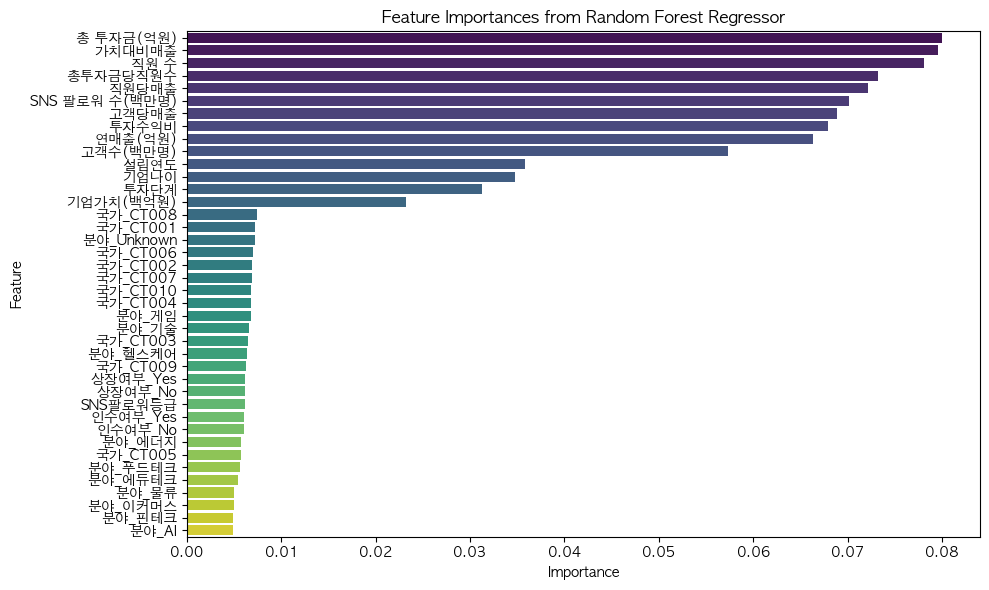

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
train = pd.read_csv('../../data/processed/processed_train.csv')
X = train.drop(columns=['ÏÑ±Í≥µÌôïÎ•†', 'ID'])
y = train['ÏÑ±Í≥µÌôïÎ•†']

# 2. Î™®Îç∏ Ï†ïÏùò Î∞è ÌïôÏäµ
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# 3. ÌîºÏ≤ò Ï§ëÏöîÎèÑ Ï∂îÏ∂ú
feature_importances = model.feature_importances_
feature_names = X.columns

# 4. ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 5. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest Regressor')
plt.tight_layout()
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2486
[LightGBM] [Info] Number of data points in the train set: 3040, number of used features: 40
[LightGBM] [Info] Start training from score 0.541086


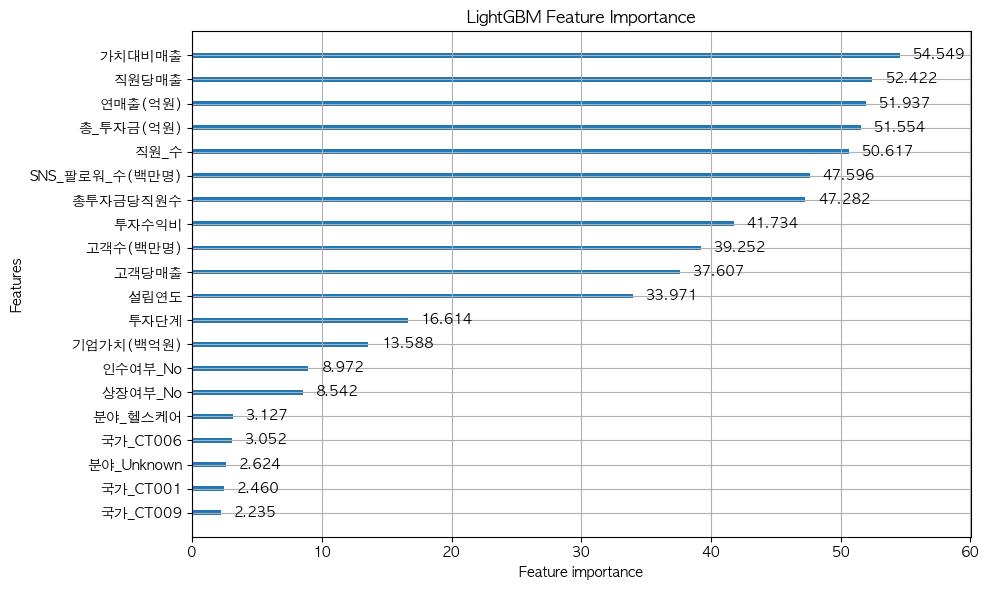

In [22]:
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# X, y Î∂ÑÎ¶¨
X = train.drop(columns=['ÏÑ±Í≥µÌôïÎ•†', 'ID'])
y = train['ÏÑ±Í≥µÌôïÎ•†']

# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï† (ÏÑ±Îä• ÎπÑÍµêÏö©, Ïó¨Í∏∞ÏÑ† Ï†ÑÏ≤¥ ÏÇ¨Ïö©Ìï¥ÎèÑ Î¨¥Î∞©)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM Î™®Îç∏ Ï†ïÏùò
lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_model.fit(X_train, y_train)

# ÌîºÏ≤ò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
lgb.plot_importance(lgb_model, max_num_features=20, importance_type='gain', figsize=(10, 6))
plt.title("LightGBM Feature Importance")
plt.tight_layout()
plt.show()

/var/folders/6v/5fx5m33x00dd03yh7nx0w9d80000gn/T/ipykernel_23844/758253214.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


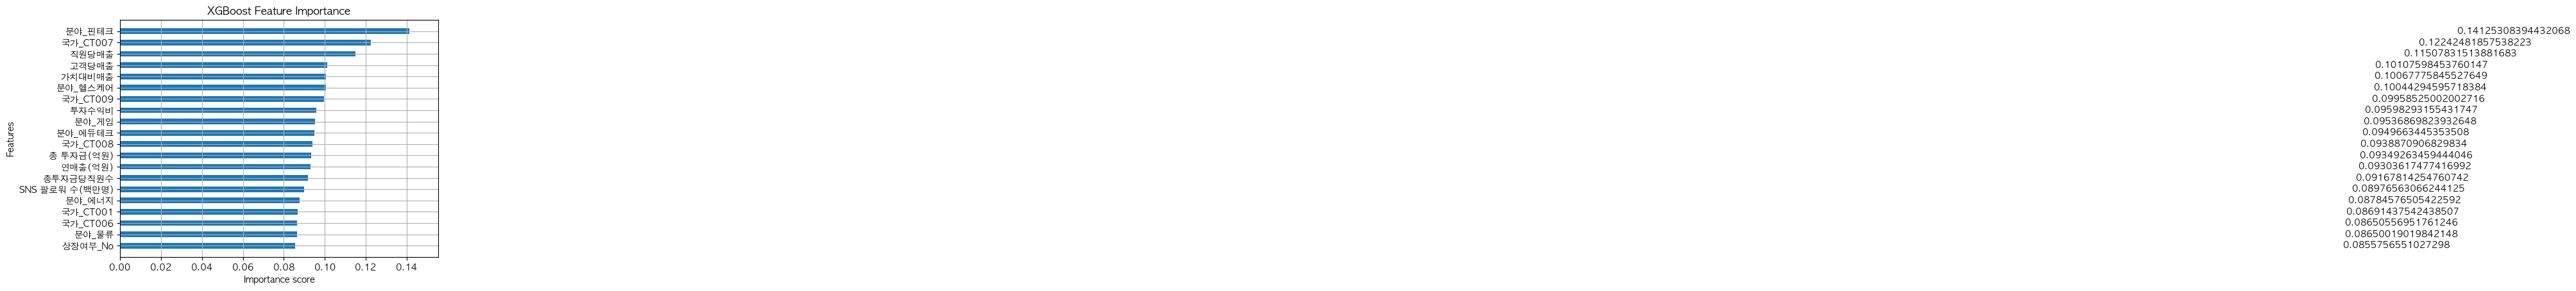

In [23]:
import xgboost as xgb
from xgboost import plot_importance

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X, y)

# ÌîºÏ≤ò Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
plot_importance(xgb_model, importance_type='gain', max_num_features=20, height=0.5)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

# üîç ÏÑ∏ Î™®Îç∏ Feature Importance ÎπÑÍµê Î∂ÑÏÑù

## ‚úÖ Í≥µÌÜµÎêú ÌïµÏã¨ ÌîºÏ≤ò
ÏÑ∏ Î™®Îç∏ Î™®Îëê Îã§ÏùåÍ≥º Í∞ôÏùÄ **Í∏∞ÏóÖÏùò Í∑úÎ™® Î∞è ÏÑ±Ïû•ÏÑ±Í≥º ÏßÅÍ≤∞Îêú ÏßÄÌëú**Îì§ÏùÑ ÎÜíÏùÄ Ï§ëÏöîÎèÑÎ°ú ÌåêÎã®:

- `ÏßÅÏõê Ïàò`
- `ÏßÅÏõêÎãπÎß§Ï∂ú`
- `Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú`
- `SNS ÌåîÎ°úÏõå Ïàò`
- `Ïó∞Îß§Ï∂ú`
- `Í≥†Í∞ùÎãπÎß§Ï∂ú`

ÎòêÌïú, Ìà¨Ïûê Í¥ÄÎ†® ÏßÄÌëúÎì§ÎèÑ Í≥µÌÜµÏ†ÅÏúºÎ°ú Ï§ëÏöî ÌîºÏ≤òÎ°ú ÌåêÎã®Îê®:

- `Ï¥ù Ìà¨ÏûêÍ∏à`
- `Ìà¨ÏûêÏàò`
- `Ìà¨ÏûêÎã®Í≥Ñ`

---

## üìä Î™®Îç∏Î≥Ñ ÌäπÏù¥Ï†ê

### üå≤ Random Forest Regressor
- Í≥ÑÎüâÏ†Å ÏßÄÌëú(ÏàòÏπòÌòï Î≥ÄÏàò)Ïóê ÎÜíÏùÄ Ï§ëÏöîÎèÑÎ•º Î∂ÄÏó¨
- `ÏßÅÏõê Ïàò`, `Ïó∞Îß§Ï∂ú`, `Ï¥ù Ìà¨ÏûêÍ∏à` Îì±Ïùò **Ï†ïÎüâÏ†Å ÌîºÏ≤ò**Í∞Ä ÏÉÅÏúÑ
- Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Ï§ëÏöîÎèÑ ÎÇÆÍ≤å ÌèâÍ∞ÄÎê®

### üåü LightGBM
- Random ForestÏôÄ Ïú†ÏÇ¨ÌïòÍ≤å **Ï†ïÎüâÏ†Å ÏßÄÌëú Ï§ëÏã¨**
- `Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú`, `ÏßÅÏõêÎãπÎß§Ï∂ú` Îì± **Î≥µÌï© Í≥ÑÏÇ∞ Î≥ÄÏàò**ÎèÑ Ï§ëÏöîÌïòÍ≤å Î∞òÏòÅ
- Îπ†Î•∏ ÌïôÏäµÍ≥º ÎÜíÏùÄ ÏÑ±Îä•ÏúºÎ°ú ÏßÅÍ¥ÄÏ†ÅÏù∏ Ï§ëÏöîÎèÑ Ìï¥ÏÑù Í∞ÄÎä•

### ‚ö° XGBoost
- **Î≤îÏ£ºÌòï Î≥ÄÏàò(Íµ≠Í∞Ä, ÏÇ∞ÏóÖÍµ∞)**Ïùò Ï§ëÏöîÎèÑÍ∞Ä ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÜíÏùå
- Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÌï† Î∞©Ïãù Î∞è ÌïôÏäµ Î∞©Ïãù(gain Í∏∞Î∞ò)Ïóê Îî∞Îùº Í≤∞Í≥ºÍ∞Ä Îã¨ÎùºÏßà Ïàò ÏûàÏùå
- **Î™®Îç∏Ïùò ÎØºÍ∞êÎèÑ**Í∞Ä ÎÜíÏùÄ Ìé∏Ïù¥ÎØÄÎ°ú Îç∞Ïù¥ÌÑ∞ Îß•ÎùΩ Í≥†Î†§ ÌïÑÏàò

---

## üß† Ï¢ÖÌï© ÏùòÍ≤¨

- **Í∏∞ÏóÖÏùò ÏÑ±Ïû•ÏÑ± Î∞è ÏÑ±Í≥º ÏòàÏ∏°**Ïù¥ Î™©Ï†ÅÏù¥ÎùºÎ©¥,  
  `LightGBM`Í≥º `Random Forest`Í∞Ä Í∞ïÏ°∞Ìïú **Í≥ÑÎüâÏ†Å ÏßÄÌëú**Í∞Ä Î≥¥Îã§ Ïã†Î¢∞Ìï† Ïàò ÏûàÎäî ÌïµÏã¨ Î≥ÄÏàòÎ°ú ÌåêÎã®Îê®.
  
- `XGBoost`Îäî Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò ÏòÅÌñ•ÎèÑÎ•º Îçî ÎÜíÍ≤å ÌèâÍ∞ÄÌïòÎØÄÎ°ú,  
  **ÏÇ∞ÏóÖÍµ∞Ïù¥ÎÇò Íµ≠Í∞ÄÏôÄ Í∞ôÏùÄ Ïô∏ÏÉù Î≥ÄÏàò**Í∞Ä Ï§ëÏöîÌïú Ïó≠Ìï†ÏùÑ Ìï† Ïàò ÏûàÎäî Î∂ÑÏÑùÏóêÏÑú Ïú†Ïö©Ìï† Ïàò ÏûàÏùå.

---

## üìå Í≤∞Î°†

- Í≥µÌÜµÏ†ÅÏúºÎ°ú Í∞ïÏ°∞Îêú ÌîºÏ≤ò(`ÏßÅÏõê Ïàò`, `SNS ÌåîÎ°úÏõå Ïàò`, `Ïó∞Îß§Ï∂ú` Îì±)Îäî Ïã§Ï†ú ÏòàÏ∏°ÏóêÎèÑ ÌïµÏã¨Ï†ÅÏù∏ Ïó≠Ìï†ÏùÑ Ìï† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå
- **Î™®Îç∏Î≥Ñ Í∞ïÏ°∞ ÌîºÏ≤òÏùò Ï∞®Ïù¥**Îäî ÏòàÏ∏° Î™©Ï†ÅÏóê Îî∞Îùº Í≥†Î†§Îê† Ïàò ÏûàÏúºÎ©∞,  
  **ÏïôÏÉÅÎ∏î ÌïôÏäµ**Ïù¥ÎÇò **ÌîºÏ≤ò ÏÑ†ÌÉù Ï†ÑÎûµ**Ïóê Ï∞∏Í≥†Ìï† Í∞ÄÏπòÍ∞Ä ÏûàÏùå

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              3800 non-null   object 
 1   ÏÑ§Î¶ΩÏó∞ÎèÑ            3800 non-null   float64
 2   Ìà¨ÏûêÎã®Í≥Ñ            3800 non-null   float64
 3   ÏßÅÏõê Ïàò            3800 non-null   float64
 4   Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)        3800 non-null   float64
 5   Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)       3800 non-null   float64
 6   Ïó∞Îß§Ï∂ú(ÏñµÏõê)         3800 non-null   float64
 7   SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)  3800 non-null   float64
 8   Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)       3800 non-null   float64
 9   ÏÑ±Í≥µÌôïÎ•†            3800 non-null   float64
 10  Íµ≠Í∞Ä_CT001        3800 non-null   bool   
 11  Íµ≠Í∞Ä_CT002        3800 non-null   bool   
 12  Íµ≠Í∞Ä_CT003        3800 non-null   bool   
 13  Íµ≠Í∞Ä_CT004        3800 non-null   bool   
 14  Íµ≠Í∞Ä_CT005        3800 non-null   bool   
 15  Íµ≠Í∞Ä_CT00

In [25]:
target_cols = ['ID','Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)','Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú','ÏßÅÏõê Ïàò','Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò',
               'ÏßÅÏõêÎãπÎß§Ï∂ú','SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)',
               'Í≥†Í∞ùÎãπÎß§Ï∂ú','Ìà¨ÏûêÏàòÏùµÎπÑ','Ïó∞Îß§Ï∂ú(ÏñµÏõê)','Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)',
               'ÏÑ§Î¶ΩÏó∞ÎèÑ','Í∏∞ÏóÖÎÇòÏù¥','Ìà¨ÏûêÎã®Í≥Ñ','Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)','ÏÑ±Í≥µÌôïÎ•†']

target_cols_for_test = ['ID','Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)','Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú','ÏßÅÏõê Ïàò','Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò',
               'ÏßÅÏõêÎãπÎß§Ï∂ú','SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)',
               'Í≥†Í∞ùÎãπÎß§Ï∂ú','Ìà¨ÏûêÏàòÏùµÎπÑ','Ïó∞Îß§Ï∂ú(ÏñµÏõê)','Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)',
               'ÏÑ§Î¶ΩÏó∞ÎèÑ','Í∏∞ÏóÖÎÇòÏù¥','Ìà¨ÏûêÎã®Í≥Ñ','Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)']



In [26]:
feature_importance_train = train[target_cols]
feature_importance_test = test[target_cols_for_test]

In [27]:
feature_importance_train.to_csv("../../data/processed/feature_importance_train.csv", index=False)
feature_importance_test.to_csv("../../data/processed/feature_importance_test.csv", index=False)


In [28]:
feature_importance_train['ÏÑ±Í≥µÌôïÎ•†'].value_counts()

ÏÑ±Í≥µÌôïÎ•†
0.1    475
0.3    475
0.4    475
0.5    475
0.6    475
0.7    475
0.8    475
0.9    475
Name: count, dtype: int64

In [29]:
feature_importance_train[feature_importance_train['Í≥†Í∞ùÎãπÎß§Ï∂ú'].isna()]

Empty DataFrame
Columns: [ID, Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê), Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú, ÏßÅÏõê Ïàò, Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò, ÏßÅÏõêÎãπÎß§Ï∂ú, SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö), Í≥†Í∞ùÎãπÎß§Ï∂ú, Ìà¨ÏûêÏàòÏùµÎπÑ, Ïó∞Îß§Ï∂ú(ÏñµÏõê), Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö), ÏÑ§Î¶ΩÏó∞ÎèÑ, Í∏∞ÏóÖÎÇòÏù¥, Ìà¨ÏûêÎã®Í≥Ñ, Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê), ÏÑ±Í≥µÌôïÎ•†]
Index: []

In [30]:
feature_importance_train.head()

ID  Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)    Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú      ÏßÅÏõê Ïàò  Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò     ÏßÅÏõêÎãπÎß§Ï∂ú  \
0  TRAIN_3959   0.073081  0.001694  0.407170  0.010105  0.001406   
1  TRAIN_0733   0.233858  0.006809  0.609053  0.004792  0.000414   
2  TRAIN_3824   0.586491  0.000438  0.493956  0.001554  0.003112   
3  TRAIN_4168   0.168157  0.001011  0.363509  0.003970  0.002390   
4  TRAIN_3771   0.684972  0.001688  0.333267  0.000897  0.000830   

   SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)     Í≥†Í∞ùÎãπÎß§Ï∂ú     Ìà¨ÏûêÏàòÏùµÎπÑ   Ïó∞Îß§Ï∂ú(ÏñµÏõê)  Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)      ÏÑ§Î¶ΩÏó∞ÎèÑ      Í∏∞ÏóÖÎÇòÏù¥  \
0           0.908  0.035461  0.008842  0.318636  0.112245  0.909091  0.090909   
1           0.400  0.002390  0.001237  0.140176  0.785714  0.681818  0.318182   
2           0.596  0.023184  0.003014  0.855976  0.491983  0.454545  0.545455   
3           0.854  0.013109  0.005907  0.483930  0.491983  0.954545  0.045455   
4           0.352  0.004168  0.000464  0.153815  0.491983  0.772727  0.227273   

   Ìà¨ÏûêÎã®Í≥Ñ  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)  ÏÑ±Í≥µÌôïÎ•†  
0  0.75   0.476429   0.1  
1  0.75   1.000000   0.1  
2  0.00   0.476429   0.1  
3  0.25   0.476429   0.1  
4  1.00   0.000000   0.1

In [31]:
feature_importance_test.head()

ID  Ï¥ù Ìà¨ÏûêÍ∏à(ÏñµÏõê)    Í∞ÄÏπòÎåÄÎπÑÎß§Ï∂ú      ÏßÅÏõê Ïàò  Ï¥ùÌà¨ÏûêÍ∏àÎãπÏßÅÏõêÏàò     ÏßÅÏõêÎãπÎß§Ï∂ú  \
0  TEST_0000   0.706330  0.000492  0.653028  0.001638  0.001019   
1  TEST_0001   0.224165  0.002381  0.742479  0.005848  0.000624   
2  TEST_0002   0.662343  0.001794  0.046330  0.000124  0.019614   
3  TEST_0003   0.300860  0.000447  0.126755  0.000747  0.005479   
4  TEST_0004   0.702665  0.001273  0.986161  0.002487  0.000767   

   SNS ÌåîÎ°úÏõå Ïàò(Î∞±ÎßåÎ™Ö)     Í≥†Í∞ùÎãπÎß§Ï∂ú     Ìà¨ÏûêÏàòÏùµÎπÑ   Ïó∞Îß§Ï∂ú(ÏñµÏõê)  Í≥†Í∞ùÏàò(Î∞±ÎßåÎ™Ö)      ÏÑ§Î¶ΩÏó∞ÎèÑ      Í∏∞ÏóÖÎÇòÏù¥  \
0           0.400  0.012858  0.001752  0.476184  0.448980  0.045455  0.954545   
1           0.840  0.005749  0.003833  0.331500  0.704082  0.863636  0.136364   
2           0.200  0.009035  0.002600  0.662501  0.897959  0.590909  0.409091   
3           1.000  0.035722  0.004306  0.499393  0.163265  0.090909  0.909091   
4           0.872  0.009668  0.002003  0.541384  0.683673  0.227273  0.772727   

   Ìà¨ÏûêÎã®Í≥Ñ  Í∏∞ÏóÖÍ∞ÄÏπò(Î∞±ÏñµÏõê)  
0  0.75   0.000000  
1  0.75   0.466264  
2  1.00   1.000000  
3  0.00   0.000000  
4  0.00   0.466264